U-Net from:

https://github.com/ternaus/TernausNet
https://arxiv.org/abs/1801.05746

In [1]:
!git clone https://github.com/ternaus/TernausNet.git

Cloning into 'TernausNet'...
remote: Enumerating objects: 123, done.
remote: Total 123 (delta 0), reused 0 (delta 0), pack-reused 123
Receiving objects: 100% (123/123), 83.86 MiB | 6.90 MiB/s, done.
Resolving deltas: 100% (66/66), done.
Checking connectivity... done.


In [1]:
!nvidia-smi

Wed Oct 31 12:57:09 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    28W / 149W |     18MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla K80           Off  | 00000000:00:05.0 Off |                    0 |
| N/A   31C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [2]:
%matplotlib inline
import cv2
from pylab import *

In [3]:
rcParams['figure.figsize'] = 15, 15

In [4]:
import os

In [5]:
os.chdir('TernausNet')

In [6]:
import torch
from torch import nn
from unet_models import unet11
from pathlib import Path
from torch.nn import functional as F
from torchvision.transforms import ToTensor, Normalize, Compose

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"

In [8]:
def get_model():
    model = unet11(pretrained=True)#'carvana')
    model.eval()
    return model.to(device)

In [9]:
model = get_model()

In [10]:
img = cv2.imread('the_smaller_image.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

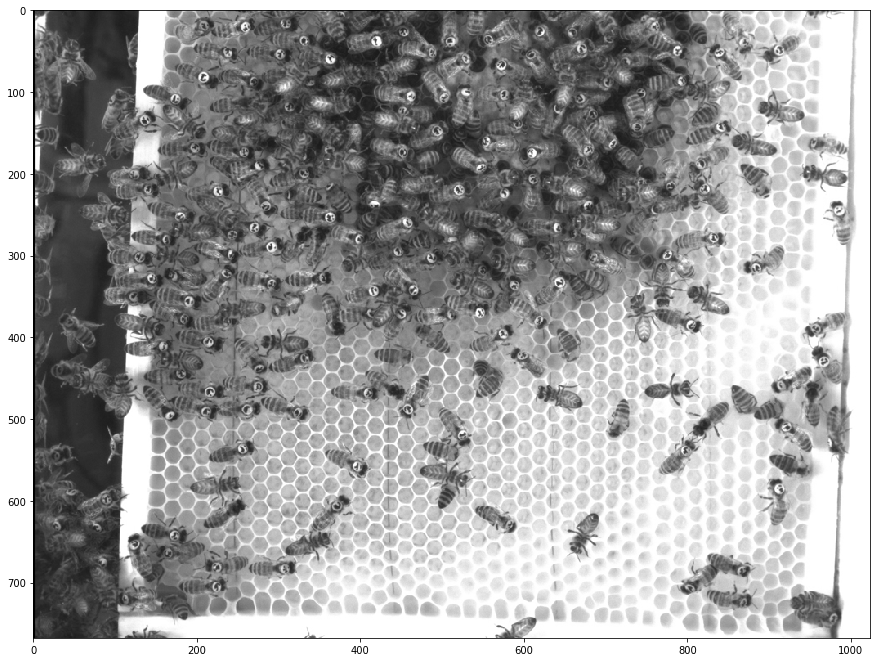

In [11]:
imshow(img)

In [12]:
img_transform = Compose([
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [13]:
with torch.no_grad():
    input_img = torch.unsqueeze(img_transform(img).to(device), dim=0)

In [14]:
with torch.no_grad():
    mask = F.sigmoid(model(input_img))

/home/shared/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [15]:
mask_array = mask.data[0].cpu().numpy()[0]

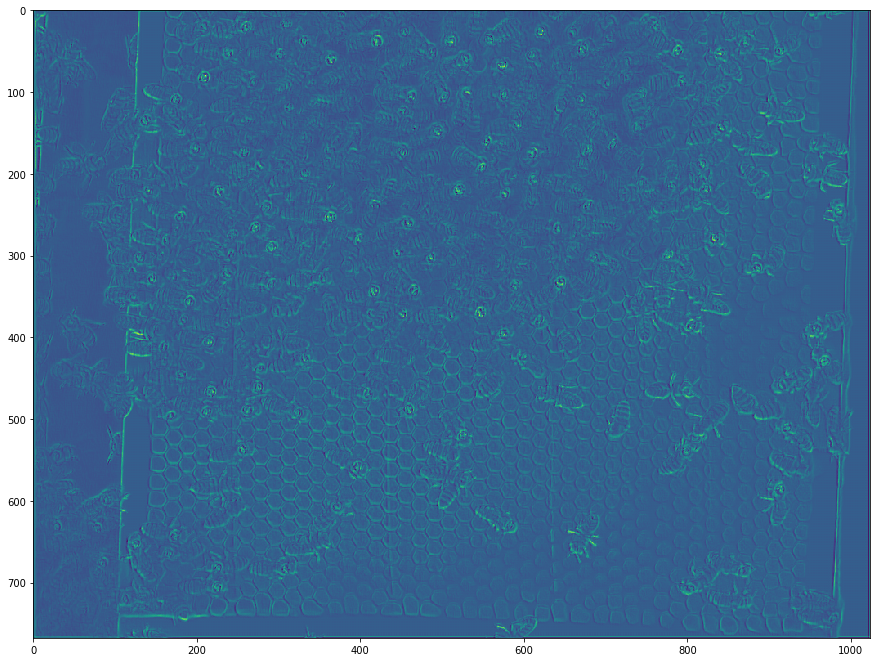

In [19]:
imshow(mask_array)

In [22]:
#just using the VGG11 encoding
torch.save(model.state_dict(), 'weights/no_train.pt')